In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model

In [ ]:
data = pd.read_csv("arg_datos.csv", delimiter=',')
data

,AÑO,CO2,B_TOTAL,PIB
0,2018,202.199,13423578,441.874
1,2017,204.594,13516311,568.798
2,2016,210.592,12823907,503.555
3,2015,210.724,13216597,580.769
4,2014,207.931,13200357,425.287
5,2013,202.582,12857408,460.291
6,2012,206.337,12916716,451.838
7,2011,199.854,12794717,379.353
8,2010,191.832,11267726,320.447
9,2009,186.426,12145029,239.470


In [ ]:
data=data.sort_values(by=["AÑO"])

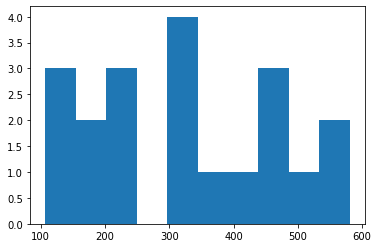

In [ ]:
_ = plt.hist(data['PIB'])

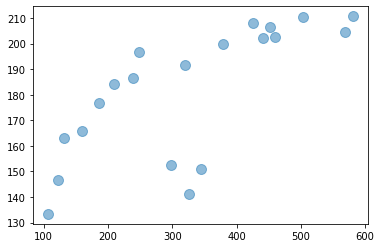

In [ ]:
plt.scatter(data["PIB"], data['CO2'], alpha= 0.5, s=100)

In [ ]:
co2 = np.sort(np.array(data["CO2"]))
pib = np.sort(np.array(data["PIB"]))


In [ ]:
n = len(pib)
cumulativa = np.linspace(1/n,1,n)

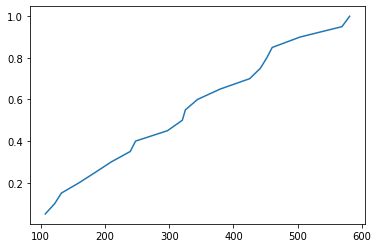

In [ ]:
plt.plot(pib, cumulativa)

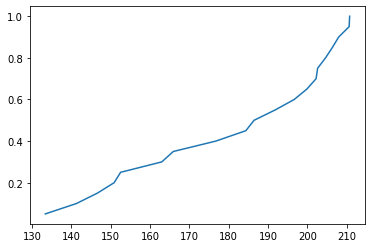

In [ ]:
plt.plot(co2, cumulativa)

0.5302903939882613

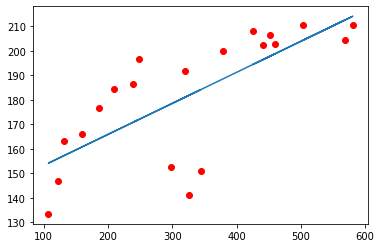

In [ ]:

Y =  pd.to_numeric(np.array(list(data["CO2"]))) # lo que voy a predecir
columns = ["PIB"] 
X = np.array(data[columns])
regresion = sklearn.linear_model.LinearRegression()
regresion.fit(X,Y)
y_predict = regresion.predict(X)
plt.plot(X,y_predict)
plt.scatter(X,Y,color="red")
regresion.score(X,Y)

In [ ]:
def fit_una_variable(nombre):
  data = pd.read_csv("arg_datos.csv")
  Y = np.array(data['CO2'])
  columns = [nombre]
  X = np.array(data[columns])
  regresion = sklearn.linear_model.LinearRegression()
  regresion.fit(X, Y)
  y_predict = regresion.predict(X)
  score = regresion.score(X,Y)
  plt.scatter(X, y_predict)
  plt.scatter(X, Y, color="red",label="stars",marker= "*")
  plt.title("Regresion lineal de = {} , Score ={:.2f}".format(nombre,score))
  plt.xlabel(nombre)
  plt.ylabel("CO2")
  plt.grid(True)


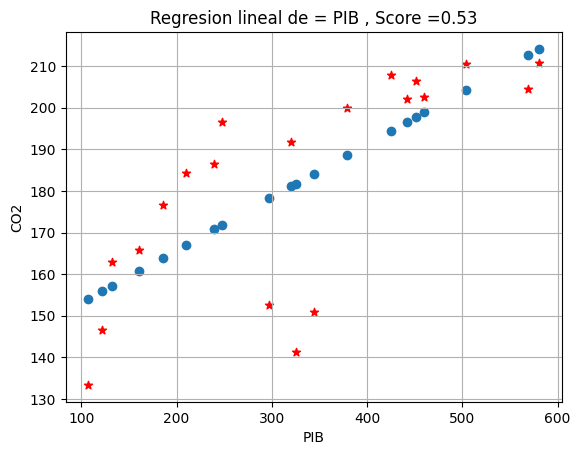

In [ ]:
fit_una_variable("PIB")

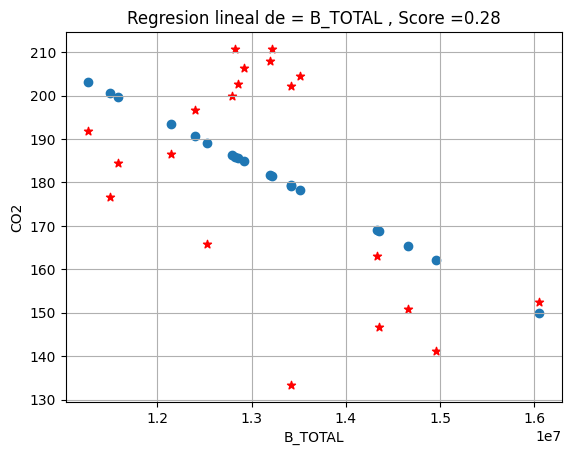

In [ ]:
fit_una_variable("B_TOTAL")

Text(0.5, 1.0, 'Dos variables con score 0.82')

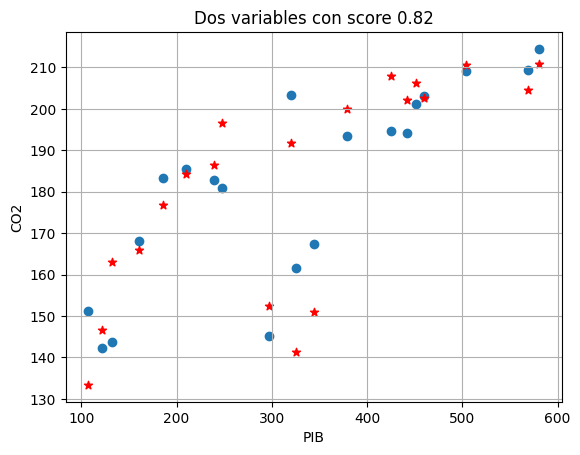

In [ ]:
data = pd.read_csv("arg_datos.csv")
Y = np.array(data['CO2'])
columns = ["PIB","B_TOTAL"]
X = np.array(data[columns])
regresion = sklearn.linear_model.LinearRegression()
regresion.fit(X, Y)
y_predict = regresion.predict(X)
score = regresion.score(X,Y)
#print(score)
plt.scatter(X[:,0], y_predict)
plt.scatter(X[:,0], Y, color="red",label="stars",marker= "*")
plt.grid(True)
plt.xlabel("PIB")
plt.ylabel("CO2")
plt.title("Dos variables con score {:.2f}".format(score))

Text(0.5, 1.0, 'Dos variables con score 0.71, con test.')

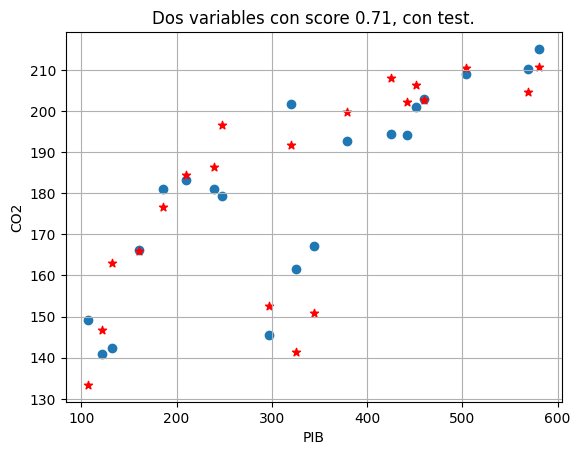

In [ ]:
import sklearn.model_selection
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y, test_size=0.2)
np.shape(X_train), np.shape(X_test)
data = pd.read_csv("arg_datos.csv")
Y = np.array(data['CO2'])
columns = ["PIB","B_TOTAL"]
X = np.array(data[columns])

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y, test_size=0.2)

regresion = sklearn.linear_model.LinearRegression()

regresion.fit(X_train, Y_train)

score = regresion.score(X_test,Y_test)
#print(score)
y_predict = regresion.predict(X)
plt.scatter(X[:,0], y_predict)
plt.scatter(X[:,0], Y, color="red",label="stars",marker= "*")
plt.xlabel("PIB")
plt.ylabel("CO2")
plt.grid(True)
plt.title("Dos variables con score {:.2f}, con test.".format(score))

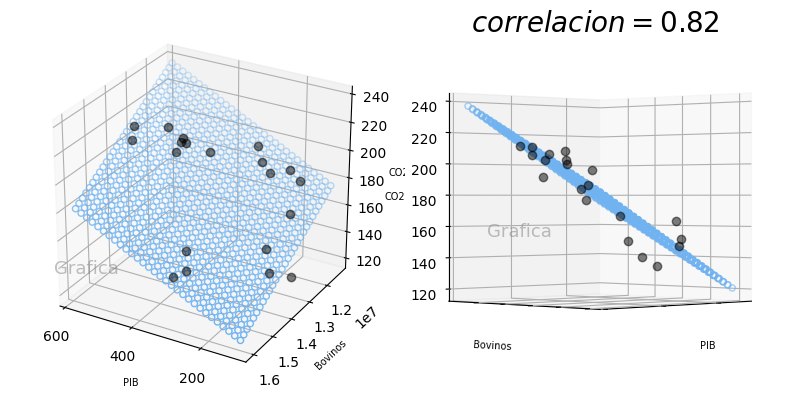

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

######################################## Data preparation #########################################

file = 'arg_datos.csv'
df = pd.read_csv(file)

X = df[['PIB', 'B_TOTAL']].values.reshape(-1,2)
Y = df['CO2']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(min(x), max(x), 30)   # range of porosity values
y_pred = np.linspace(min(y), max(y), 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
#ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1 , ax2]
#axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('PIB', fontsize=7)
    ax.set_ylabel('Bovinos', fontsize=7)
    ax.set_zlabel('CO2', fontsize=7)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'Grafica', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'Grafica', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
#ax3.text2D(0.85, 0.85, 'Grafica', fontsize=13, ha='center', va='center',
           #transform=ax3.transAxes, color='grey', alpha=0.5)
ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax1.view_init(elev=28, azim=120)
#ax2.view_init(elev=4, azim=114)
ax2.view_init(elev=0, azim=45)

fig.suptitle('$correlacion = %.2f$' % r2, fontsize=20)

fig.tight_layout()